In [1]:
from sklearn import svm
import numpy as np
import pandas as pd

#Import dataset
FetalHealthDataSet = pd.read_csv(r'C:\Users\abhar\Downloads\fetal_health.csv')

In [2]:
X = FetalHealthDataSet.drop(['fetal_health'],axis = 1)
Y = FetalHealthDataSet.fetal_health.values

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import svm

In [5]:
#Feature Selection 
X.shape
FeatureSelection = ExtraTreesClassifier(n_estimators = 20)
FeatureSelection = FeatureSelection.fit(X,Y)
FeatureSelection.feature_importances_
TheModel = SelectFromModel(FeatureSelection,prefit = True)
X_new = TheModel.transform(X)
X_new.shape

(2126, 9)

In [8]:
# Scale features 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The accuracy of this model is: 0.8802816901408451
[[324  14   5]
 [ 22  30   2]
 [  3   5  21]]


Text(33.0, 0.5, 'True')

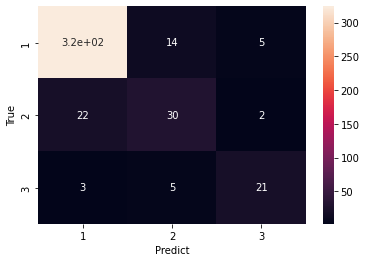

In [9]:
#Linear Discriminant Analysis
LDA_classification = LinearDiscriminantAnalysis()
LDA_classification.fit(X_train_scaled, Y_train)
LDA_classification.predict(X_test_scaled)
print('The accuracy of this model is: {}'.format(accuracy_score(Y_test,LDA_classification.predict(X_test_scaled))))

cm_LDA = confusion_matrix(Y_test,LDA_classification.predict(X_test_scaled))
print(cm_LDA)

cm_LDA_df = pd.DataFrame(cm_LDA,index = ['1','2','3'], columns = ['1','2','3'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_LDA_df, annot=True)
plt.xlabel("Predict")
plt.ylabel("True")

The accuracy of this model is: 0.92018779342723
[[326  16   1]
 [ 15  39   0]
 [  2   0  27]]


Text(33.0, 0.5, 'True')

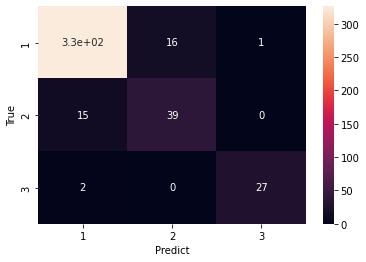

In [10]:
#Decision Tree Model 
DTree = DecisionTreeClassifier() 
DTree.fit(X_train_scaled,Y_train)
Y_Dt = DTree.predict(X_test_scaled)
print('The accuracy of this model is: {}'.format(accuracy_score(Y_test, Y_Dt)))

cm_DT = confusion_matrix(Y_test,Y_Dt)
print(cm_DT)

cm_DT_df = pd.DataFrame(cm_DT,index = ['1','2','3'], columns = ['1','2','3'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_DT_df, annot=True)
plt.xlabel("Predict")
plt.ylabel("True")


The accuracy of this model is: 0.892018779342723
[[324  18   1]
 [ 18  33   3]
 [  2   4  23]]


Text(33.0, 0.5, 'True')

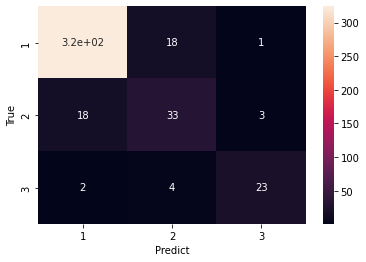

In [11]:
#SVM

SVM_class = svm.SVC(kernel='linear')
SVM_class.fit(X_train_scaled,Y_train)
Y_SVM_pred = SVM_class.predict(X_test_scaled)
print('The accuracy of this model is: {}'.format(accuracy_score(Y_test, Y_SVM_pred)))

cm_SVM = confusion_matrix(Y_test,Y_SVM_pred)
print(cm_SVM)

cm_SVM_df = pd.DataFrame(cm_SVM,index = ['1','2','3'], columns = ['1','2','3'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_SVM_df, annot=True)
plt.xlabel("Predict")
plt.ylabel("True")